In [2]:
from flask import Flask, redirect, render_template, request, url_for
import requests
import json
#from api_key_get import key_get
#import xml.etree.ElementTree as ET
#import xmltodict
#from collections import OrderedDict
from flask_sqlalchemy import SQLAlchemy
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import sklearn.ensemble as ske
import sklearn.metrics as skm
from sqlalchemy.sql.functions import coalesce
import numpy as np
import math

In [3]:
app = Flask(__name__)
app.debug = True

SQLALCHEMY_DATABASE_URI = "mysql+mysqlconnector://{username}:{password}@{hostname}/{databasename}".format(
    username="flaskuser",
    password="dersAGef3rover",

    hostname="127.0.0.1",
    databasename="organic_integrity",
)
app.config["SQLALCHEMY_DATABASE_URI"] = SQLALCHEMY_DATABASE_URI
app.config["SQLALCHEMY_POOL_RECYCLE"] = 299
app.config["SQLALCHEMY_TRACK_MODIFICATIONS"] = False

db = SQLAlchemy(app)
#app.secret_key = ""
#login_manager = LoginManager()
#login_manager.init_app(app)
#migrate = Migrate(app, db)

In [4]:
# Models
class OrganicOperation(db.Model):
    __tablename__ = "organic_operation"
    op_certifierName = db.Column(db.String(256))
    op_nopOpID = db.Column(db.String(256), primary_key=True)
    op_name = db.Column(db.String(256))
    op_otherNames = db.Column(db.String(256))
    op_clientID = db.Column(db.String(256))
    op_contFirstName = db.Column(db.String(256))
    op_contLastName = db.Column(db.String(256))
    op_status = db.Column(db.String(256))
    op_statusEffectiveDate = db.Column(db.DateTime)
    op_nopAnniversaryDate = db.Column(db.DateTime)
    op_lastUpdatedDate = db.Column(db.DateTime)
    opSC_CR = db.Column(db.String(256))
    opSC_CR_ED = db.Column(db.DateTime)
    opSC_LS = db.Column(db.String(256))
    opSC_LS_ED = db.Column(db.DateTime)
    opSC_WC = db.Column(db.String(256))
    opSC_WC_ED = db.Column(db.DateTime)
    opSC_HANDLING = db.Column(db.String(256))
    opSC_HANDLING_ED = db.Column(db.DateTime)
    opPA_line1 = db.Column(db.String(256))
    opPA_line2 = db.Column(db.String(256))
    opPA_city = db.Column(db.String(256))
    opPA_state = db.Column(db.String(256))
    opPA_country = db.Column(db.String(256))
    opPA_zip = db.Column(db.String(256))
    opPA_countyCode = db.Column(db.String(256))
    opPA_county = db.Column(db.String(256))
    opMA_line1 = db.Column(db.String(256))
    opMA_line2 = db.Column(db.String(256))
    opMA_city = db.Column(db.String(256))
    opMA_state = db.Column(db.String(256))
    opMA_country = db.Column(db.String(256))
    opMA_zip = db.Column(db.String(256))
    opMA_countyCode = db.Column(db.String(256))
    opMA_county = db.Column(db.String(256))
    op_phone = db.Column(db.String(256))
    op_email = db.Column(db.String(256))
    op_url = db.Column(db.String(256))
    op_opExtraInfo = db.Column(db.String(256))
    opEx_broker = db.Column(db.String(256))
    opEx_csa = db.Column(db.String(256))
    opEx_copacker = db.Column(db.String(256))
    opEx_dairy = db.Column(db.String(256))
    opEx_distributor = db.Column(db.String(256))
    opEx_marketerTrader = db.Column(db.String(256))
    opEx_restaurant = db.Column(db.String(256))
    opEx_retailer = db.Column(db.String(256))
    opEx_poultry = db.Column(db.String(256))
    opEx_privateLabeler = db.Column(db.String(256))
    opEx_slaughterHouse = db.Column(db.String(256))
    opEx_storage = db.Column(db.String(256))
    opEx_growerGroup = db.Column(db.String(256))
    opCert_url = db.Column(db.String(256))


class OrganicItem(db.Model):
    __tablename__ = "organic_item"
    ci_artID = db.Column(db.Integer, primary_key=True) # Artificial primary key added in.
    ci_nopOpID = db.Column(db.String(256), db.ForeignKey(OrganicOperation.op_nopOpID))
    ci_certNumber = db.Column(db.String(256))
    ci_nopScope = db.Column(db.String(256))
    ci_nopCategory = db.Column(db.String(256))
    ci_nopCatID = db.Column(db.String(256))
    ci_nopCatName = db.Column(db.String(256))
    ci_nopItemID = db.Column(db.String(256))
    ci_itemList = db.Column(db.String(256))
    ci_varieties = db.Column(db.String(256))
    ci_status = db.Column(db.String(256))
    ci_statusEffectiveDate = db.Column(db.String(256))
    ci_organic100 = db.Column(db.String(256))
    ci_organic = db.Column(db.String(256))
    ci_madeWithOrganic = db.Column(db.String(256))
    fk_operation_ID = db.relationship("OrganicOperation", foreign_keys=ci_nopOpID)

In [5]:
us_date = db.session.query(
    OrganicOperation.op_statusEffectiveDate,
    OrganicOperation.op_status,
    db.func.count(OrganicOperation.op_nopOpID).label("op_count")
    ).select_from(OrganicOperation).group_by(
    OrganicOperation.op_statusEffectiveDate,
    OrganicOperation.op_status
    ).filter(OrganicOperation.opPA_country.like("%United States%")).all()


(array([17897., 18017., 18140., 18262., 18383., 18506., 18628., 18748.,
        18871., 18993., 19113.]),
 [Text(17897.0, 0, '2019-01'),
  Text(18017.0, 0, '2019-05'),
  Text(18140.0, 0, '2019-09'),
  Text(18262.0, 0, '2020-01'),
  Text(18383.0, 0, '2020-05'),
  Text(18506.0, 0, '2020-09'),
  Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05')])

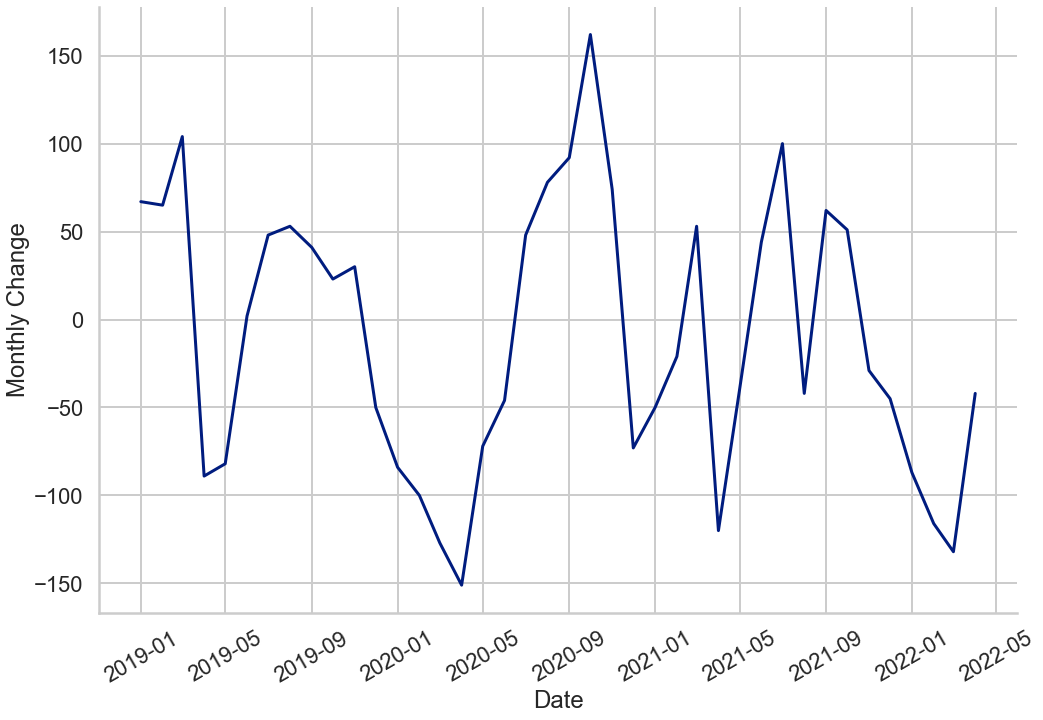

In [6]:
trend_df = pd.DataFrame(us_date)
trend_df['year'] = pd.DatetimeIndex(trend_df['op_statusEffectiveDate']).year
trend_df['op_statusEffectiveDate'] = trend_df['op_statusEffectiveDate'].apply(lambda x: x.replace(day=1))
trend_df = trend_df.loc[trend_df['year'] > 2018]
trend_df = trend_df.loc[trend_df["op_status"] != "Applied; APEDA Certified"]

trend_df = trend_df.groupby(['op_status','op_statusEffectiveDate'], as_index=False)['op_count'].sum()

trend_df = trend_df.pivot_table(
    index="op_statusEffectiveDate", 
    columns="op_status", 
    values="op_count",
    aggfunc="sum", fill_value=0,
    margins=False)

trend_df["Trend"] = trend_df["Certified"] - (trend_df["Revoked"] + trend_df["Surrendered"] + trend_df["Suspended"])

sns.set_style('whitegrid')
sns.set_palette('dark')
sns.set_context("poster")
sns.relplot(data=trend_df, x='op_statusEffectiveDate', y='Trend', kind='line',height=10, aspect=1.5)

#plt.title('Certification Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Change')
plt.xticks(rotation=30)

In [7]:
trend_df

op_status,Certified,Revoked,Surrendered,Suspended,Trend
op_statusEffectiveDate,,,,,
2019-01-01,87,0,0,20,67
2019-02-01,91,0,0,26,65
2019-03-01,130,0,1,25,104
2019-04-01,129,1,189,28,-89
2019-05-01,186,0,245,23,-82
2019-06-01,202,0,181,19,2
2019-07-01,258,0,184,26,48
2019-08-01,257,1,166,37,53
2019-09-01,219,0,144,34,41


In [8]:
# Try to get a change in overal count
sum(trend_df["Trend"])

-401

In [9]:
us_df = pd.DataFrame(us_date)

In [10]:
us_cert_current = sum(us_df.loc[us_df["op_status"]=="Certified","op_count"])

In [12]:
def trend_change(trend):
    global us_cert_current
    us_cert_current = us_cert_current - trend
    return us_cert_current

In [13]:
trend_df["total_count"] = trend_df["Trend"].apply(trend_change)

(array([17897., 18017., 18140., 18262., 18383., 18506., 18628., 18748.,
        18871., 18993., 19113.]),
 [Text(17897.0, 0, '2019-01'),
  Text(18017.0, 0, '2019-05'),
  Text(18140.0, 0, '2019-09'),
  Text(18262.0, 0, '2020-01'),
  Text(18383.0, 0, '2020-05'),
  Text(18506.0, 0, '2020-09'),
  Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05')])

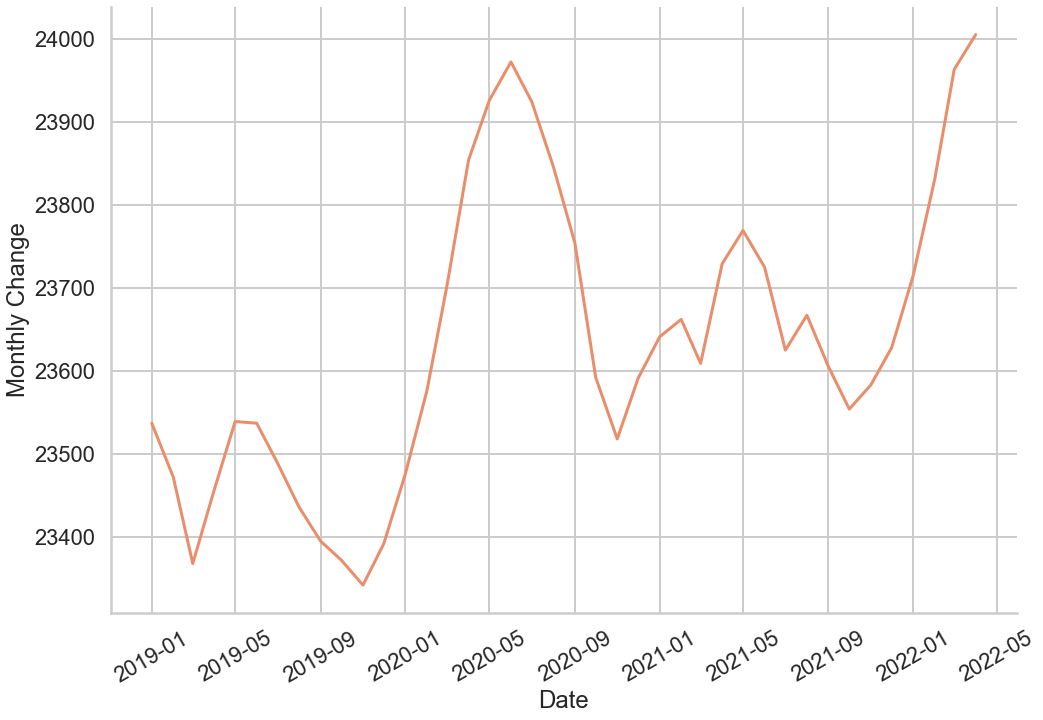

In [15]:

sns.set_style('whitegrid')
sns.set_palette('flare')
sns.set_context("poster")
sns.relplot(data=trend_df, x='op_statusEffectiveDate', y='total_count', kind='line',height=10, aspect=1.5)

#plt.title('Certification Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Change')
plt.xticks(rotation=30)

(array([17897., 18017., 18140., 18262., 18383., 18506., 18628., 18748.,
        18871., 18993., 19113.]),
 [Text(17897.0, 0, '2019-01'),
  Text(18017.0, 0, '2019-05'),
  Text(18140.0, 0, '2019-09'),
  Text(18262.0, 0, '2020-01'),
  Text(18383.0, 0, '2020-05'),
  Text(18506.0, 0, '2020-09'),
  Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05')])

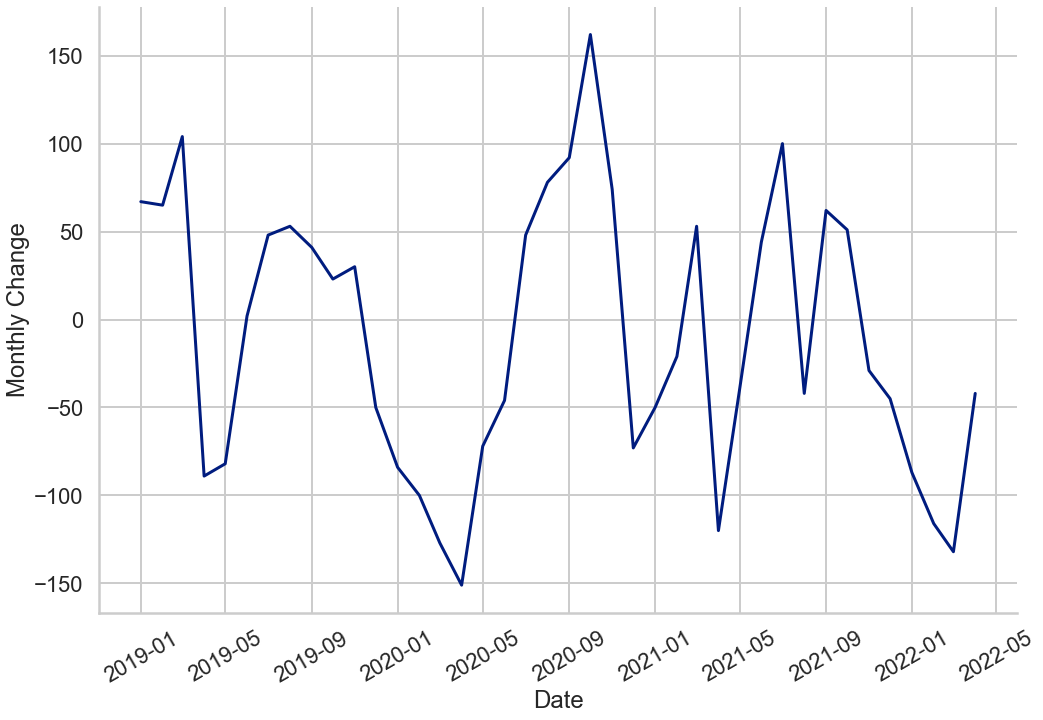

In [16]:
       # Get current count of US certified operations
trend_df = pd.DataFrame(us_date)
global us_cert_current
us_cert_current = sum(trend_df.loc[trend_df["op_status"]=="Certified","op_count"])

# Function to apply in gettingmonthly certification count
def trend_change(trend):
    global us_cert_current
    us_cert_current = us_cert_current - trend
    return us_cert_current

trend_df['year'] = pd.DatetimeIndex(trend_df['op_statusEffectiveDate']).year
trend_df['op_statusEffectiveDate'] = trend_df['op_statusEffectiveDate'].apply(lambda x: x.replace(day=1))
trend_df = trend_df.loc[trend_df['year'] > 2018]
trend_df = trend_df.loc[trend_df["op_status"] != "Applied; APEDA Certified"]

trend_df = trend_df.groupby(['op_status','op_statusEffectiveDate'], as_index=False)['op_count'].sum().reset_index()

trend_df = trend_df.pivot_table(
    index="op_statusEffectiveDate",
    columns="op_status",
    values="op_count",
    aggfunc="sum", fill_value=0,
    margins=False)

trend_df["Trend"] = trend_df["Certified"] - (trend_df["Revoked"] + trend_df["Surrendered"] + trend_df["Suspended"])

# Get total count of certified operations estimate per month
# This will not necessarily capture changes to/from suspension accurately
trend_df.sort_values("op_statusEffectiveDate", ascending=False, inplace=True)
trend_df["total_count"] = trend_df["Trend"].apply(trend_change)
trend_df.sort_values("op_statusEffectiveDate", ascending=True, inplace=True)
sns.set_style('whitegrid')
sns.set_palette('dark')
sns.set_context("poster")
sns.relplot(data=trend_df, x='op_statusEffectiveDate', y='Trend', kind='line',height=10, aspect=1.5)

#plt.title('Certification Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Change')
plt.xticks(rotation=30)


In [131]:
# Transform the trend data into a format fo supervised learning.
trend = trend_df.Trend

# Remove the current month from the data, as the full count is not in place.
c_y = str(datetime.datetime.now().year)
c_m = str(datetime.datetime.now().month)
c_start_m = c_y + "-" + c_m + "-01"
current = datetime.datetime.strptime(c_start_m, "%Y-%m-%d")

trend = trend.loc[trend.index != current]

# Get the trends column and the shifted data column into a new dataframe. Extract values.
trends = pd.DataFrame(trend)
trends["Shift"] = trends["Trend"]

trends.Shift = trends.Shift.shift(-1)

trends = trends.dropna()

trend_vals = trends.values

# Split the dataset into training, validation, and testing sets.
# Using ~20% for validation and ~10% for testing.
val_length = math.ceil(len(trend_vals) * 0.2)
test_length = math.ceil(len(trend_vals) * 0.1)
train_length = len(trend_vals) - (val_length + test_length)

train = trend_vals[0:train_length]
validation = trend_vals[train_length: (train_length + val_length)]
test = trend_vals[(train_length + val_length):]

In [132]:
history = [i for i in train]
predictions = list()
for i in range(len(validation)):
    # split test row into input and output columns
    val_x, val_y = validation[i, :-1], validation[i, -1]
    # fit model on history and make a prediction
    
    # transform list into array
    train = np.asarray(history)
    # split into input and output columns
    train_x, train_y = train[:, 0].reshape(-1, 1), train[:, 1]
    
    # fit model
    model = ske.RandomForestRegressor(n_estimators=1000, criterion="absolute_error")
    model.fit(train_x, train_y)
    
    # make a one-step prediction
    pred_result = model.predict([val_x])[0]
    
    # store forecast in list of predictions
    predictions.append(pred_result)
    
    # add actual observation to history for the next loop
    history.append(validation[i])
    
    # summarize progress
    print(f"Actual: {val_y}; Predicted: {pred_result}")
print(skm.mean_absolute_error(validation[:,1], predictions))

Actual: -120.0; Predicted: 49.5585
Actual: -40.0; Predicted: -133.184
Actual: 44.0; Predicted: 15.5125
Actual: 100.0; Predicted: 33.8815
Actual: -42.0; Predicted: -15.7665
Actual: 62.0; Predicted: 33.5535
Actual: 51.0; Predicted: 77.4085
Actual: -29.0; Predicted: -21.383
55.75675


In [133]:
# Get the first of each month from a given starting timestamp for the number in months.
def month_accumulate(start_month, num_months):
    month_list = list()
    temp = start_month
    for i in range(0,num_months):
        next_month = temp + datetime.timedelta(days=32)
        day_subtract = next_month.day - 1
        next_month = next_month - datetime.timedelta(days=day_subtract)
        month_list.append(next_month)
        temp = next_month
    return month_list

In [134]:
trend.loc[pred_month]

-132

In [135]:
# Get the last month in the series.
last_month = trend.index.max()
pred_month = last_month
upcoming_months = month_accumulate(pred_month, 6)
# Get the last value in the dataset.
# Predict for the next months.
last_val = trend.loc[pred_month]
predictions = list()
for i in range(0,len(upcoming_months)):
    temp_val = model.predict(np.array(last_val).reshape(-1, 1))
    predictions.append(temp_val)
    last_val = temp_val

In [136]:
# Combine the results of the prediction with the most recent past trend records.
# Plot the result.
results = pd.DataFrame(zip(upcoming_months,[i[0] for i in predictions]), columns=["Month","Trend"])
results["Type"] = "Predicted"

trend_pred_df = pd.DataFrame(trend).reset_index()
trend_pred_df = trend_pred_df.rename(columns={"op_statusEffectiveDate":"Month"})
trend_pred_df = trend_pred_df[["Month", "Trend"]]
trend_pred_df["Type"] = "Actual"

trend_pred_df = pd.concat([trend_pred_df, results])

trend_pred_df = trend_pred_df.reset_index()

# Get about 6 months before the current month
trend_pred_df = trend_pred_df.loc[trend_pred_df["Month"] > (last_month - datetime.timedelta(days=183))]

trend_pred_df = trend_pred_df.sort_values("Month")

In [207]:
# Duplicate the last record of known value in order to show a smooth continuation.
max_actual = trend_pred_df.loc[trend_pred_df["Type"]=="Actual","Month"].max()

line_continue = trend_pred_df.loc[trend_pred_df["Month"]==max_actual].copy()
line_continue["Type"] = "Predicted"

trend_pred_show = pd.concat([trend_pred_df,line_continue]).reset_index()

(array([18871., 18932., 18993., 19052., 19113., 19174., 19236.]),
 [Text(18871.0, 0, '2021-09'),
  Text(18932.0, 0, '2021-11'),
  Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03'),
  Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09')])

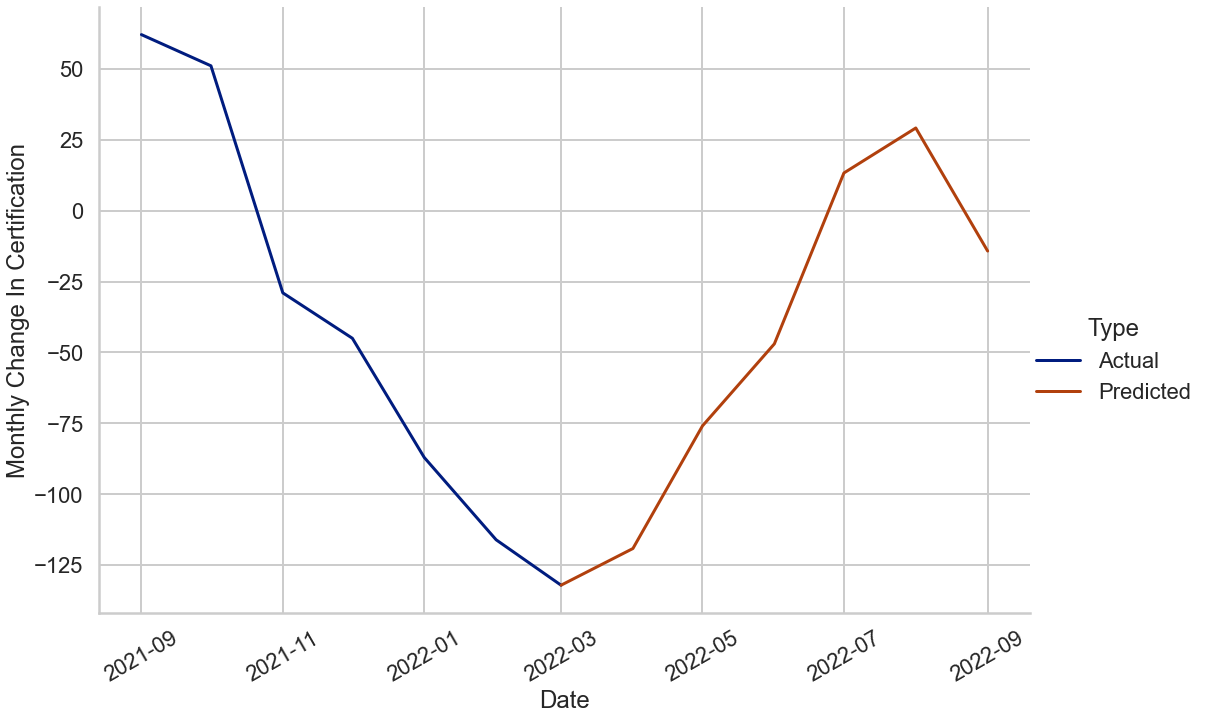

In [208]:
sns.set_style('whitegrid')
sns.set_palette('dark')
sns.set_context("poster")

#sns.lineplot(data=trend, x="Month", y="Trend", hue="Type")
sns.relplot(data=trend_pred_show, x='Month', y='Trend', kind='line', hue='Type',height=10, aspect=1.5)
#plt.title('Certification Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Change In Certification')
plt.xticks(rotation=30)

In [179]:
# Calculate the total count of overall operations throughout the timeframe of the prediction.
start_count = trend_df.loc[trend_pred_df.Month.min(), "total_count"]

first=True
count_list = list()
month_list = list()
for index, row in trend_pred_df.iterrows():
    if first:
        current_count = start_count
        first=False
    else:
        current_count = current_count + row["Trend"]
    month_list.append(row["Month"])
    count_list.append(current_count)
count_df = pd.DataFrame(zip(month_list, count_list), columns=["Month", "total_count"])

trend_pred_count_df = trend_pred_df.merge(right=count_df,on="Month",how="inner")

In [201]:
# Duplicate the last record of known value in order to show a smooth continuation.
max_actual = trend_pred_count_df.loc[trend_pred_count_df["Type"]=="Actual","Month"].max()

line_continue = trend_pred_count_df.loc[trend_pred_count_df["Month"]==max_actual].copy()
line_continue["Type"] = "Predicted"

trend_pred_count_show = pd.concat([trend_pred_count_df,line_continue]).reset_index()

(array([18871., 18932., 18993., 19052., 19113., 19174., 19236.]),
 [Text(18871.0, 0, '2021-09'),
  Text(18932.0, 0, '2021-11'),
  Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03'),
  Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09')])

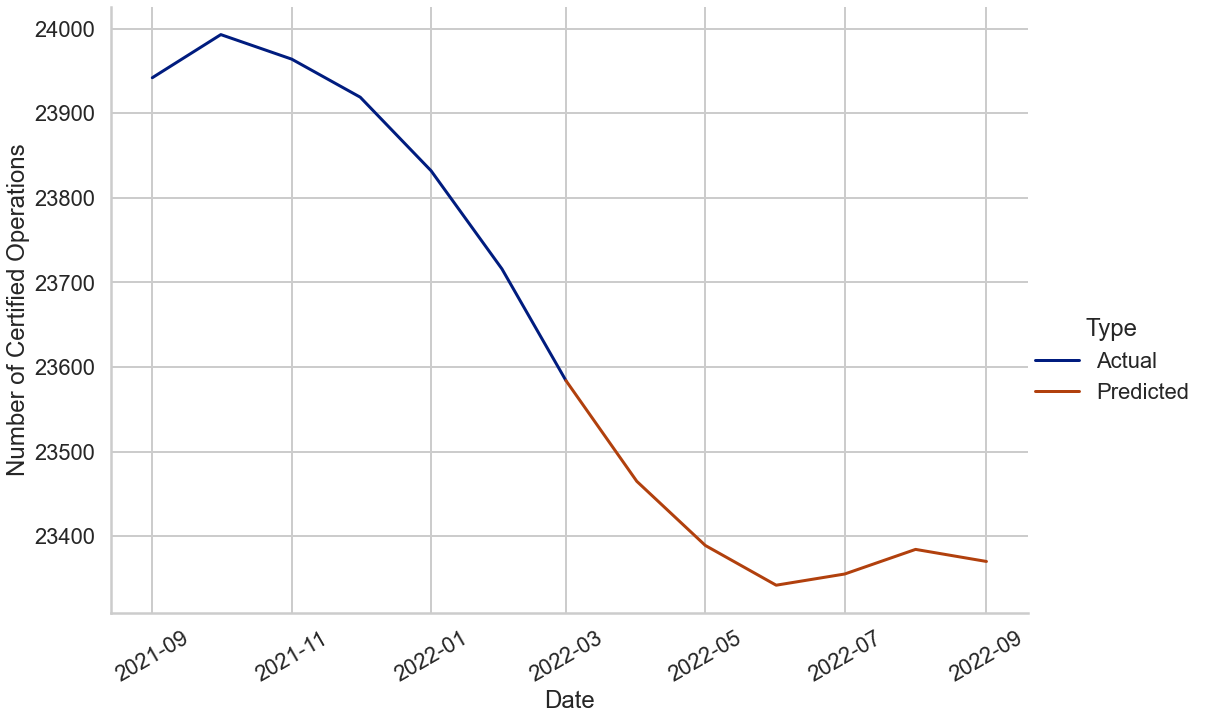

In [205]:
sns.set_style('whitegrid')
sns.set_palette('dark')
sns.set_context("poster")

#sns.lineplot(data=trend, x="Month", y="Trend", hue="Type")
sns.relplot(data=trend_pred_count_show, x='Month', y='total_count', kind='line', hue='Type',height=10, aspect=1.5)
#plt.title('Certification Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Certified Operations')
plt.xticks(rotation=30)